In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#@title Old functions
# # Paste 1 image on second
# im1 = Image.open('/content/3_GL_expheat.jpg').resize((112,112))
# im2 = Image.open('/content/3_GL_expmask.jpg')
# im1.paste(im2, (0,0), im2) # Последний параметр — альфаканал, используемый для наложения
# im1.save('r1.png')
# def create_bb_from_image( mask):
#   # Read color image
#   mask = np.array(Image.open(mask))
#   i=0
#   for color in np.unique(mask):
#     if color == 0:
#       continue
#     x, y, w, h = cv2.boundingRect(np.uint8(mask == color))
#     #out = cv2.rectangle(img.copy(), (x, y), (x+w, y+h), (0, int(color), 0), 2)
#     i +=1
#     # Show image with bounding box
#     #cv2_imshow(out)
#     if i==40:
#       bb = [x, y, y+h , x+w]
#       return bb


In [3]:
def bb_from_image(image):
  image = cv2.imread(image)
  image = cv2.resize(image,(112,112))
  blue_img, green_img, red_img = cv2.split(image)
  thresh = cv2.threshold(red_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  # Find contours
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
  cv2_imshow(image)
  return [[y, x, y+h,x+w], [x, y, w, h]]

#Reading an image
def read_image(path):
    return cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)

def create_mask(bb, x):
    """Creates a mask for the bounding box of same shape as image"""
    rows,cols,*_ = x.shape
    Y = np.zeros((rows, cols))
    bb = bb.astype(np.int)
    Y[bb[0]:bb[2], bb[1]:bb[3]] = 1.
    return Y

def mask_to_bb(Y):
    """Convert mask Y to a bounding box, assumes 0 as background nonzero object"""
    cols, rows = np.nonzero(Y)
    if len(cols)==0: 
        return np.zeros(4, dtype=np.float32)
    top_row = np.min(rows)
    left_col = np.min(cols)
    bottom_row = np.max(rows)
    right_col = np.max(cols)
    return np.array([left_col, top_row, right_col, bottom_row], dtype=np.float32)

def create_bb_array(x):
    """Generates bounding box array from a train_df row"""
    return np.array([x[5],x[4],x[7],x[6]])

def resize_image_bb(read_path,write_path,bb,sz):
    """Resize an image and its bounding box and write image to new path"""
    im = read_image(read_path)
    im_resized = cv2.resize(im, (int(1.49*sz), sz))
    Y_resized = cv2.resize(create_mask(bb, im), (int(1.49*sz), sz))
    new_path = str(write_path/read_path.parts[-1])
    cv2.imwrite(new_path, cv2.cvtColor(im_resized, cv2.COLOR_RGB2BGR))
    return new_path, mask_to_bb(Y_resized)

def create_corner_rect(bb, label='none', color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color,
                         fill=False, lw=3, label = label)

def show_corner_bb(im, bb, bb_exp):
    plt.imshow(im)
    predicted_rect = create_corner_rect(bb, color='green', label='Predicted BB')
    true_rect = create_corner_rect(bb_exp,label='True BB')
    plt.legend(handles=[predicted_rect, true_rect])
    plt.gca().add_patch(predicted_rect)
    plt.gca().add_patch(true_rect)

def get_iou(bb1, bb2):
  x_left = max(bb1[0], bb2[0])
  y_top = max(bb1[1], bb2[1])
  x_right = min(bb1[2], bb2[2])
  y_bottom = min(bb1[3], bb2[3])
  if x_right < x_left or y_bottom < y_top:
    return 0.0
  intersection_area = (x_right - x_left) * (y_bottom - y_top)
  bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
  bb2_area = (bb2[3] - bb2[0]) * (bb2[3] - bb2[1])
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)

  return iou

In [ ]:
img = Image.open('/content/1_GL_orig.jpg').resize((112,112))
img.save('resized_orig.png')
im = cv2.imread('resized_orig.png')
im = im[:, :, [2, 1, 0]]

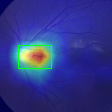

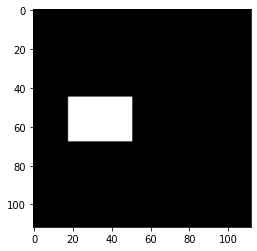

In [ ]:
bb, bb_iou = bb_from_image('/content/1_GL_expheat.jpg')
bb = np.array(bb)
Y = create_mask(bb, im)
plt.imshow(Y, cmap='gray')

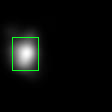

NameError: ignored

In [ ]:
bb_exp, bb_exp_iou = bb_from_image('/content/1_GL_expmask..jpg')
bb_exp = np.array(bb_exp)
Y = create_mask(bb_exp, im)
plt.imshow(Y, cmap='gray')

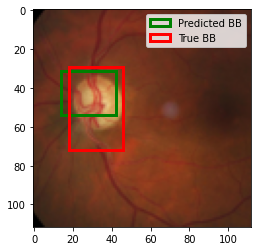

In [ ]:
show_corner_bb(img, bb, bb_exp)

In [ ]:
get_iou(bb_exp, bb)

0.575

In [33]:
image = cv2.imread('3_GL_expmask.jpg')
image = cv2.resize(image,(112,112))
blue_img, green_img, red_img = cv2.split(image)
thresh_mask = cv2.threshold(red_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

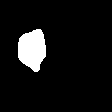

In [34]:
cv2_imshow(thresh_mask)

In [35]:
image = cv2.imread('/content/3_GL_expheat.jpg')
image = cv2.resize(image,(112,112))
blue_img, green_img, red_img = cv2.split(image)
thresh = cv2.threshold(red_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

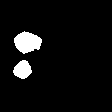

In [36]:
cv2_imshow(thresh)

In [37]:
#@title IoU
union = thresh + thresh_mask
intersection = thresh * thresh_mask
union_count = np.count_nonzero(union)
intersection_count = np.count_nonzero(intersection)
intersection_count/ union_count

0.3423044575273339